<a href="https://colab.research.google.com/github/AkashArya96/Cat-Vs-Dog/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 43.8MB/s]
100% 1.06G/1.06G [00:29<00:00, 39.2MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,BatchNormalization,Dropout

In [10]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image,label):
  image = tf.cast(image/255.0 , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 107ms/step - loss: 1.1716 - accuracy: 0.5615 - val_loss: 0.6407 - val_accuracy: 0.6274
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.6103 - accuracy: 0.6508 - val_loss: 0.6004 - val_accuracy: 0.6756
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5057 - accuracy: 0.7322 - val_loss: 0.5155 - val_accuracy: 0.7234
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4362 - accuracy: 0.7699 - val_loss: 0.4517 - val_accuracy: 0.7910
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3937 - accuracy: 0.7954 - val_loss: 0.5004 - val_accuracy: 0.7550
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3479 - accuracy: 0.8156 - val_loss: 0.5039 - val_accuracy: 0.7236
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2993 - accuracy: 0.8409 - val_loss: 0.4874 - val_ac

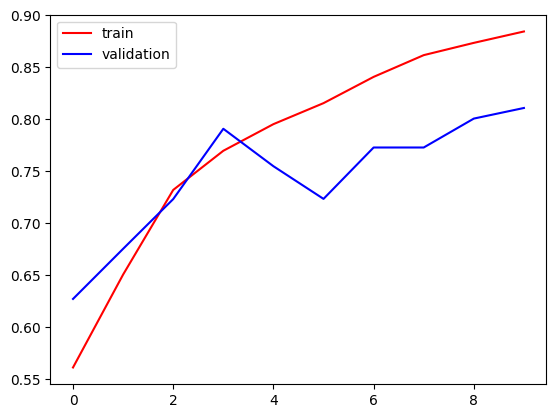

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

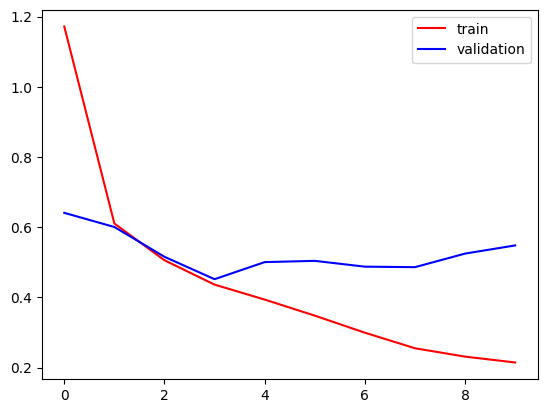

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

In [32]:
test_img = cv2.imread('/content/dog.jpg')

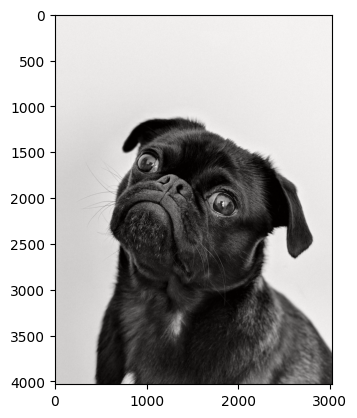

In [33]:
plt.imshow(test_img)

In [34]:
test_img.shape

(4032, 3024, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_input = test_img.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)